In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary
from safetensors.torch import save_model, load_model


In [2]:
NUM_CLASSES = 10

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


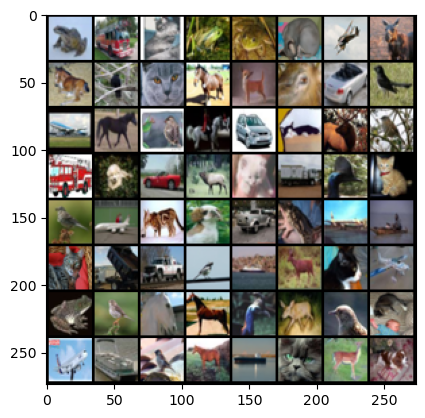

In [10]:
def imshow(img):
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [11]:
labels

tensor([6, 9, 3, 6, 6, 3, 0, 4, 7, 2, 3, 7, 5, 4, 1, 2, 0, 7, 2, 7, 1, 3, 4, 2,
        9, 5, 1, 4, 3, 9, 2, 3, 2, 0, 3, 5, 1, 3, 0, 8, 3, 9, 9, 2, 8, 4, 3, 0,
        6, 2, 7, 7, 2, 4, 2, 3, 0, 8, 2, 7, 8, 3, 4, 5])

In [18]:
class Mlp(nn.Module):
    def __init__(self):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(3072, 200)
        self.fc2 = nn.Linear(200, 150)
        self.fc3 = nn.Linear(150, 10)
    def forward(self, x):
        x = x.view(-1, 3072)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [25]:
model = Mlp().to('cuda')
summary(model, (3, 32, 32))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]         614,600
            Linear-2                  [-1, 150]          30,150
            Linear-3                   [-1, 10]           1,510
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 2.47
Estimated Total Size (MB): 2.48
----------------------------------------------------------------


In [26]:
num_epochs = 10

for epoch in range(num_epochs):
    for imgs, labels in train_loader:
        imgs, labels = imgs.to('cuda'), labels.to('cuda')    
        output = model(imgs)
        loss = criterion(output, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 1.7249
Epoch [2/10], Loss: 1.9226
Epoch [3/10], Loss: 1.5871
Epoch [4/10], Loss: 1.5840
Epoch [5/10], Loss: 1.2527
Epoch [6/10], Loss: 1.2108
Epoch [7/10], Loss: 1.6028
Epoch [8/10], Loss: 1.7230
Epoch [9/10], Loss: 1.7285
Epoch [10/10], Loss: 1.3936


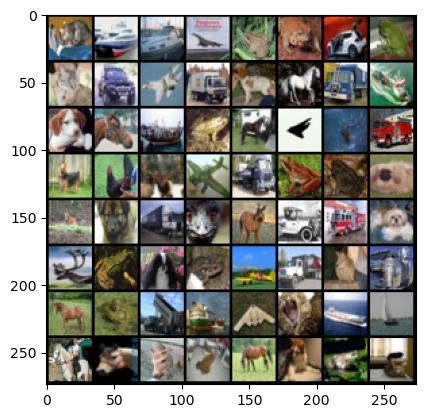

In [27]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [44]:
CLASSES = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
]
_, preds = model(images.to('cuda')).max(dim=1)

[(CLASSES[preds[i]], CLASSES[labels[i]]) for i in range(64)]


[('cat', 'cat'),
 ('truck', 'ship'),
 ('ship', 'ship'),
 ('airplane', 'airplane'),
 ('deer', 'frog'),
 ('frog', 'frog'),
 ('cat', 'automobile'),
 ('deer', 'frog'),
 ('bird', 'cat'),
 ('automobile', 'automobile'),
 ('ship', 'airplane'),
 ('truck', 'truck'),
 ('frog', 'dog'),
 ('horse', 'horse'),
 ('automobile', 'truck'),
 ('ship', 'ship'),
 ('horse', 'dog'),
 ('deer', 'horse'),
 ('ship', 'ship'),
 ('frog', 'frog'),
 ('deer', 'horse'),
 ('bird', 'airplane'),
 ('airplane', 'deer'),
 ('truck', 'truck'),
 ('deer', 'dog'),
 ('frog', 'bird'),
 ('frog', 'deer'),
 ('bird', 'airplane'),
 ('automobile', 'truck'),
 ('frog', 'frog'),
 ('frog', 'frog'),
 ('deer', 'dog'),
 ('deer', 'deer'),
 ('dog', 'dog'),
 ('truck', 'truck'),
 ('automobile', 'bird'),
 ('frog', 'deer'),
 ('truck', 'automobile'),
 ('truck', 'truck'),
 ('dog', 'dog'),
 ('airplane', 'deer'),
 ('frog', 'frog'),
 ('truck', 'dog'),
 ('frog', 'frog'),
 ('airplane', 'airplane'),
 ('truck', 'truck'),
 ('cat', 'cat'),
 ('ship', 'truck'),
 ('d